In [103]:
# course link : https://www.linkedin.com/learning/nlp-with-python-for-machine-learning-essential-training/
# for this course python should be at least 3.6

from platform import python_version
python_version()

'3.9.7'

### NLTK

In [104]:
# download natural language tool kit
# pip install nltk if we don't have it
# first check if we have it
import nltk
nltk.__version__

'3.6.5'

In [105]:
#download stopwords module inside nltk data
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\z004fuuz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
# stopwords include words that doesn't have emotion 
# so that we can drop this words while making sentiment analysis

from nltk.corpus import stopwords
stopwords.words("english")[0:100:20]

['i', 'himself', 'that', 'a', 'through']

### Unstructured Data

In [107]:
# read unstructured data sms spam collection
# .tsv = tab seperated value 
# tsv files mostly used in databases

## NOTE : df = pd.read_csv("SMSSpamCollection.tsv", seperator = "\t", header = None) is easier way

raw_data = open("SMSSpamCollection.tsv").read()
raw_data[0:100]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take yo"

In [108]:
# we can parse this data by tab
label_list= []
text_list = []

parsed_data = raw_data.split("\n")
print(parsed_data[0:5])

# I wrote -1 because last value was '' and error occured while splitting it
for row in parsed_data[:-1]:
    #print(row.split("\t"))
    row_list = row.split("\t")
    label_list.append(row_list[0])
    text_list.append(row_list[1])


["ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "ham\tNah I don't think he goes to usf, he lives around here though", 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.', 'ham\tI HAVE A DATE ON SUNDAY WITH WILL!!']


In [109]:
# create a dataframe by using our lists
import pandas as pd

df = pd.DataFrame({
    "label" : label_list,
    "text" : text_list
})

df.head()

,label,text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [110]:
#data exploration

print("This dataset has {} rows. {} rows are labeled as ham.".format(len(df), len(df[df["label"] == "ham"])))
print("In this dataset there are {} missing values".format(df.isnull().sum().sum()))

This dataset has 5570 rows. 4824 rows are labeled as ham.
In this dataset there are 0 missing values


### Expressions

In [111]:
# "[r-q]" means all of the characters between r and q 
# "[r-q]+" means all of the characters between r and q and more than one character
# "[0-9]+" means all of the numbers
# "[r-q0-9]+" means all of the numbers & characters between
# NOTE: w is for words W is the exact opposite

In [112]:
import re 

text1 = "Hello  little              one." #I can't split by using just one \s
text1_list = re.split("\s+", text1)
print(text1_list)

text2 = "Hello//)=there    ^#little>>>>>>>>one." #I just need these words
text2_list = re.findall("\w+", text2)
print(text2_list)

#sub(expression to find the text you want, text you want to change with this found text, input_text )
text3 = "Everyone knows what SAP08 is."
print(re.findall("[A-Z]+[0-9]+", text3))
text3 = re.sub("[A-Z]+[0-9]+", "RPA", text3)
print(text3)

['Hello', 'little', 'one.']
['Hello', 'there', 'little', 'one']
['SAP08']
Everyone knows what RPA is.


### LET THE PROJECT BEGIN

In [113]:
# from beginning

import pandas as pd
import re
import string

# set max length of the column
pd.set_option("display.max_colwidth",100)

# read dataset
df = pd.read_csv("SMSSpamCollection.tsv", sep = "\t", header = None)
df.columns = ["label","text"]
df.head()

,label,text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [114]:
# explore string punctuation

print(string.punctuation)
print("k!" in string.punctuation)
  

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
False


In [115]:
def clear_punctuation(text):

    #I want to make this function but save all this returned characters as string array
    # for char in text:
    #   if char not in string.punctuation:
    #      return char
    
    #if I write " ".join it puts space between all of the characters
    
    clean_text = "".join([char for char in text if char not in string.punctuation])
    return clean_text
    
clear_punctuation("i'm bor.ed!")

'im bored'

In [116]:
# apply this function to all of the data

df["cleaned_text"] = df["text"].apply(lambda x: clear_punctuation(x))
df.head()

,label,text,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


In [117]:
# remove raw text

df.drop("text", axis = 1, inplace = True)
df.head()

,label,cleaned_text
0,ham,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL


In [118]:
# delete special characters and multiple spaces

def tokenize(text):
    cleared_text = re.split("\W+", text) #find all words = split by all the non words
    return cleared_text
    
tokenize("hello         everyone")

['hello', 'everyone']

In [119]:
# apply this function to df

df.cleaned_text = df["cleaned_text"].apply(lambda x: tokenize(x.lower()))
df[:100:20]

,label,cleaned_text
0,ham,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
20,ham,"[ffffffffff, alright, no, way, i, can, meet, up, with, you, sooner]"
40,ham,"[great, i, hope, you, like, your, man, well, endowed, i, am, ltgt, inches]"
60,ham,"[ok, lar, i, double, check, wif, da, hair, dresser, already, he, said, wun, cut, v, short, he, s..."
80,ham,"[yup, next, stop]"


In [120]:
# remove stop words
import nltk

stop_words = nltk.corpus.stopwords.words("english")
stop_words[0:100:25]

['i', 'herself', 'been', 'with']

In [121]:
def delete_stopwords(word_list):
    cleaned_data = [word for word in word_list if word not in stop_words]
    return cleaned_data

delete_stopwords(['i', 'herself', 'been', 'happy','sad'])

['happy', 'sad']

In [122]:
df.cleaned_text = df.cleaned_text.apply(lambda x: delete_stopwords(x))
df[:100:20]

,label,cleaned_text
0,ham,"[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
20,ham,"[ffffffffff, alright, way, meet, sooner]"
40,ham,"[great, hope, like, man, well, endowed, ltgt, inches]"
60,ham,"[ok, lar, double, check, wif, da, hair, dresser, already, said, wun, cut, v, short, said, cut, l..."
80,ham,"[yup, next, stop]"


In [123]:
# stemming = removing prefix/suffix from word to find core of the word
# porter stemmer = removes well known affix from words

ps = nltk.PorterStemmer()
ps.stem("growing")

'grow'

In [124]:
# stemming df

def stemming(text_list):
    stemmed_text = [ps.stem(word) for word in text_list]
    return stemmed_text

stemming(["running", "happily", "sadness"])

# NOTE: As you can see stemming rips the cut and says 'happili', it's not accurate as lemming but faster.

['run', 'happili', 'sad']

In [125]:
# apply to df

#df.cleaned_text = df.cleaned_text.apply(lambda x: stemming(x))
#df[:100:20]

In [126]:
# lemmatizing 

nltk.download("wordnet")
wn = nltk.WordNetLemmatizer()
wn.lemmatize("happily")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\z004fuuz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'happily'

In [127]:
def lemmatizing(text_list):
    lemmatized_text = [ps.stem(word) for word in text_list]
    return lemmatized_text

df.cleaned_text = df.cleaned_text.apply(lambda x: stemming(x))
df[:100:20]
text = df.cleaned_text

In [128]:
# we can bring them together 
def clean_text(text):
    
    cleaned_text = "".join([char.lower() for char in text if char not in string.punctuation])  #clear punctuation
    cleaned_text = re.split("\W+", cleaned_text)                                                      #tokenizing
    cleaned_text = [word for word in cleaned_text if word not in stop_words]                   #clear stopwords
    cleaned_text = [ps.stem(word) for word in cleaned_text]                                    #clear affix
    
    return cleaned_text
    

In [129]:
# count vectorization
# it counts each word for every given input and builds a logic according to the counts of words
# for example offer appears min 3 times in a spam mails

from sklearn.feature_extraction.text import CountVectorizer


# read dataset
df = pd.read_csv("SMSSpamCollection.tsv", sep = "\t", header = None)
df.columns = ["label","text"]

#analyser can analyse data itself but in this case we give it our function
count_vect = CountVectorizer(analyzer = clean_text)
count_features = count_vect.fit_transform(df["text"])
df["count_features"] = list(count_features.toarray()) ## added to df as feature
print(count_vect.get_feature_names()) #encoded as numbers
print(count_features.toarray()[0:5])
print(count_features.shape)

['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p', '0870121318

In [130]:
# if we want to see features as words, we can shrink the dataset
sample_df = df[:10]
count_vect2 = CountVectorizer(analyzer = clean_text)
vectorized_features2 = count_vect2.fit_transform(sample_df["text"])
print(count_vect2.get_feature_names())
print(vectorized_features2.shape)

['08002986030', '08452810075over18', '09061701461', '100', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '4', '6day', '87121', '87575', '9', '900', 'aid', 'anymor', 'appli', 'around', 'bless', 'breather', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'co', 'code', 'colour', 'comp', 'copi', 'cost', 'cri', 'csh11', 'cup', 'custom', 'date', 'dont', 'enough', 'entitl', 'entri', 'even', 'fa', 'final', 'free', 'friend', 'fulfil', 'goe', 'gonna', 'grant', 'help', 'hl', 'home', 'hour', 'im', 'info', 'ive', 'k', 'kl341', 'latest', 'like', 'live', 'may', 'mell', 'minnaminungint', 'mobil', 'month', 'nah', 'network', 'nurungu', 'oru', 'patent', 'per', 'pound', 'press', 'prize', 'promis', 'questionstd', 'r', 'ratetc', 'receiv', 'receivea', 'repli', 'request', 'reward', 'right', 'search', 'select', 'send', 'set', 'six', 'soon', 'speak', 'stuff', 'sunday', 'take', 'talk', 'text', 'thank', 'think', 'though', 'time', 'tkt', 'today', 'tonight', 'treat', 'tsan

In [131]:
# sparse matrix : when matrix has lots of 0s, we can only store non zero elements location and save storage

count_features # it is a sparse matrix

<5568x8107 sparse matrix of type '<class 'numpy.int64'>'
	with 50137 stored elements in Compressed Sparse Row format>

In [132]:
# we can solve this by making it an array
print(count_features.toarray().shape)
count_df_features = pd.DataFrame(count_features.toarray())
print(count_df_features)

(5568, 8107)
      0     1     2     3     4     5     6     7     8     9     ...  8097  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
5563     0     0     0     0     0     0     0     0     0     0  ...     0   
5564     0     0     0     0     0     0     0     0     0     0  ...     0   
5565     0     0     0     0     0     0     0     0     0     0  ...     0   
5566     0     0     0     0     0     0     0     0     0     0  ...     0   
5567     0     0     0     0     0     0     0     0     0     0  ...     0   

      8098  8099  8100  8101  8102  81

In [133]:
# N gram vectorization
# The difference between N gram and count vect is: N gram includes combinations of words
# if n = 2      nlp is , is interesting, interesting today
# if n = 3      nlp is interesting, is interesting today
# google autocomplete uses this 
# ngram wants sting!

# read dataset again
df = pd.read_csv("SMSSpamCollection.tsv", sep = "\t", header = None)
df.columns = ["label","text"]


    

df.text = df.text.apply(lambda x: " ".join(clean_text(x)))
df


,label,text
0,ham,ive search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
2,ham,nah dont think goe usf live around though
3,ham,even brother like speak treat like aid patent
4,ham,date sunday
...,...,...
5563,spam,2nd time tri 2 contact u u 750 pound prize 2 claim easi call 087187272008 now1 10p per minut btn...
5564,ham,ü b go esplanad fr home
5565,ham,piti mood soani suggest
5566,ham,guy bitch act like id interest buy someth els next week gave us free


In [134]:
# import count vectorizer with n gram

ngram_vectorizer = CountVectorizer(ngram_range = (2,2))
ngram_features = ngram_vectorizer.fit_transform(df.text)
df["ngram_features"] = list(ngram_features.toarray()) # add to df as feature
print(ngram_features.shape)
print(ngram_vectorizer.get_feature_names())

(5568, 31275)
['008704050406 sp', '0089mi last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '0207 153', '02072069400 bx', '02073162414 cost', '02085076972 repli', '020903 2nd', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '06 good', '07046744435 arrang', '07090298926 reschedul', '07099833605 reschedul', '07123456789 87077', '0721072 find', '07732584351 rodger', '07734396839 ibh', '07742676969 show', '07753741225 show', '0776xxxxxxx uve', '077xxx 2000', '07801543489 guarante', '07808 xxxxxx', '07808247860 show', '07808726822 award', '07815296484 show', '0784987 show', '0789xxxxxxx today', '0796xxxxxx today', '07973788240 show', '07xxxxxxxxx 2000', '07xxxxxxxxx show', '0800 0721072', '0800 169', '0800 18', '0800 195', '0800 1956669', '0800 505060', '0800 542', '08000407165 18', '08000776320 repli', '08000839402 2stoptx', '08000839402 2stoptxt', '08000839402 call', '08000839402 call2optout4qf2', '08000839402 call2optoutf4q'

In [135]:
# turn sparse vector into df

ngram_df_features = pd.DataFrame(ngram_features.toarray())
ngram_df_features.columns = ngram_vectorizer.get_feature_names()
ngram_df_features.head()

,008704050406 sp,0089mi last,0121 2025050,01223585236 xx,01223585334 cum,0125698789 ring,02 user,020603 2nd,0207 153,02072069400 bx,...,zoe 18,zoe hit,zogtoriu stare,zoom cine,zouk nichol,zyada kisi,üll finish,üll submit,üll take,〨ud even
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# TF - IDF = term frequency - inverse document frequency
# cells represents weight instead of counts
# the higher the wight, the rarer a word appears

# read dataset
df = pd.read_csv("SMSSpamCollection.tsv", sep = "\t", header = None)
df.columns = ["label","text"]



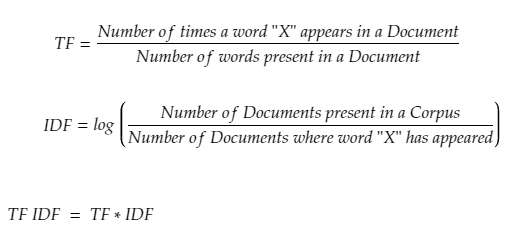

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
tfidf_features = tfidf_vect.fit_transform(df.text)
df["tfidf_features"] = list(tfidf_features.toarray())
print(tfidf_vect.get_feature_names())
print(tfidf_features)

['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p', '0870121318

In [138]:
# convert sparse vector into a df

tfidf_df_features = pd.DataFrame(tfidf_features.toarray())
tfidf_df_features


,0,1,2,3,4,5,6,7,8,9,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335215,0.0,0.0
5565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [139]:
# feature engineering

# read dataset
df = pd.read_csv("SMSSpamCollection.tsv", sep = "\t", header = None)
df.columns = ["label","text"]

In [140]:
# we are searching for an information that can help us to predict if a mail ham or spam
# first estimation is the length of the text

word_count = []
for row in df.text:
    word_count.append(len(row.split(" ")))

df["word_count"] = word_count
print(df["word_count"])

# in video there is a short way to do it
# df["character_count"] = df["word_count"].apply(lambda x: len(x) - x.count(" ")) # minus white spaces

0       37
1       28
2       13
3       16
4        8
        ..
5563    30
5564     8
5565    10
5566    26
5567     6
Name: word_count, Length: 5568, dtype: int64


In [141]:
# second estimation is that punctuation count matters


punct_div_char = []
for row in df.text:
    char_count =len([char for char in row])
    punct_count = len([char for char in row if char in string.punctuation])
    punct_div_char.append(round((punct_count/char_count),3)*100)
punct_div_char

df["punctuation num divided by char num"] = punct_div_char

In [142]:
df["punctuation num divided by char num"]

0        2.0
1        3.9
2        3.3
3        2.6
4        5.7
        ... 
5563     5.0
5564     2.8
5565    12.3
5566     0.8
5567     3.8
Name: punctuation num divided by char num, Length: 5568, dtype: float64

In [143]:
df

,label,text,word_count,punctuation num divided by char num
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,37,2.0
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,28,3.9
2,ham,"Nah I don't think he goes to usf, he lives around here though",13,3.3
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,16,2.6
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,8,5.7
...,...,...,...,...
5563,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...,30,5.0
5564,ham,Will ü b going to esplanade fr home?,8,2.8
5565,ham,"Pity, * was in mood for that. So...any other suggestions?",10,12.3
5566,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,26,0.8


In [144]:
# feature evaluation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#inline = to show graphs even if we dont write plt.show()


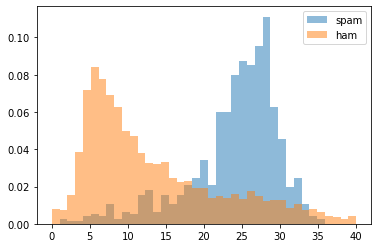

In [145]:
# bin = range
# alpha = transparency (if 1 it is not transparent)
# density = calculate by density (sum/wide) #  ???????

bins = np.linspace(0,40,40)#????????
plt.hist(df[df["label"]=="spam"]["word_count"], bins, alpha = 0.5,density = True, label = "spam")
plt.hist(df[df["label"]=="ham"]["word_count"], bins, alpha = 0.5, density  = True, label = "ham")
plt.legend() # to show labels

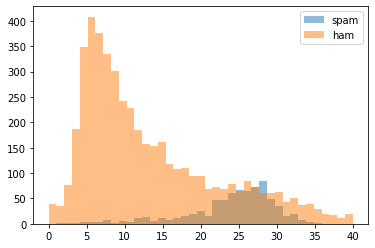

In [146]:
# calculated by probability instead of density
# IT IS NOT PROPERATE FOR OUR EXAMPLE SO I WONT USE IT

bins = np.linspace(0,40,40)
plt.hist(df[df["label"]=="spam"]["word_count"], bins, alpha = 0.5,density = False, label = "spam")
plt.hist(df[df["label"]=="ham"]["word_count"], bins, alpha = 0.5, density  = False, label = "ham")
plt.legend() # to show labels

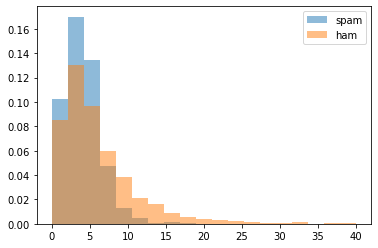

In [147]:
# evaluate punctuation percentage
# punctuation doesnt help much
bins = np.linspace(0,40,20)
plt.hist(df[df["label"]=="spam"]["punctuation num divided by char num"], bins, alpha = 0.5,density = True, label = "spam")
plt.hist(df[df["label"]=="ham"]["punctuation num divided by char num"], bins, alpha = 0.5, density  = True, label = "ham")
plt.legend() # to show labels

# It is not very clear, so ı wont use this column as a feature

(array([ 39.,  38.,  77., 188., 351., 412., 378., 343., 304., 247., 232.,
        197., 172., 159., 173., 126., 120., 126., 113., 120.,  84., 118.,
        114., 139., 132., 150., 146., 145., 109.,  97.,  57.,  70.,  45.,
         42.,  32.,  20.,  17.,  12.,  20.]),
 array([ 0.        ,  1.02564103,  2.05128205,  3.07692308,  4.1025641 ,
         5.12820513,  6.15384615,  7.17948718,  8.20512821,  9.23076923,
        10.25641026, 11.28205128, 12.30769231, 13.33333333, 14.35897436,
        15.38461538, 16.41025641, 17.43589744, 18.46153846, 19.48717949,
        20.51282051, 21.53846154, 22.56410256, 23.58974359, 24.61538462,
        25.64102564, 26.66666667, 27.69230769, 28.71794872, 29.74358974,
        30.76923077, 31.79487179, 32.82051282, 33.84615385, 34.87179487,
        35.8974359 , 36.92307692, 37.94871795, 38.97435897, 40.        ]),
 <BarContainer object of 39 artists>)

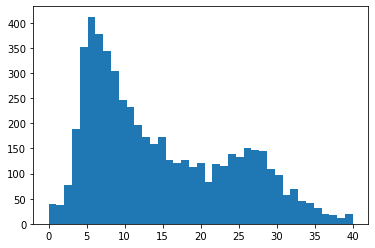

In [148]:
# feature engineering - transformation
# to see all the distribution without seperate them with their labels

bins = np.linspace(0,40,40)
plt.hist( df["word_count"], bins)

(array([530., 433., 703., 829., 692., 504., 380., 332., 281., 142., 136.,
        108.,  92.,  85.,  50.,  46.,  26.,  31.,  21.,  20.,  16.,   9.,
         17.,   6.,  11.,   2.,  10.,   6.,   1.,   3.,   4.,   2.,  11.,
          0.,   0.,   2.,   3.,   2.,   1.]),
 array([ 0.        ,  1.02564103,  2.05128205,  3.07692308,  4.1025641 ,
         5.12820513,  6.15384615,  7.17948718,  8.20512821,  9.23076923,
        10.25641026, 11.28205128, 12.30769231, 13.33333333, 14.35897436,
        15.38461538, 16.41025641, 17.43589744, 18.46153846, 19.48717949,
        20.51282051, 21.53846154, 22.56410256, 23.58974359, 24.61538462,
        25.64102564, 26.66666667, 27.69230769, 28.71794872, 29.74358974,
        30.76923077, 31.79487179, 32.82051282, 33.84615385, 34.87179487,
        35.8974359 , 36.92307692, 37.94871795, 38.97435897, 40.        ]),
 <BarContainer object of 39 artists>)

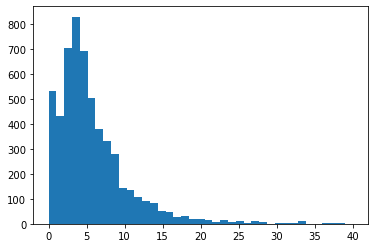

In [149]:
# show the distribution 

plt.hist(df["punctuation num divided by char num"], bins)

In [150]:
# this is transformation
# source : https://www.linkedin.com/learning/nlp-with-python-for-machine-learning-essential-training/box-cox-power-transformation?autoplay=true&dApp=71676066&leis=LAA&resume=false&u=73045713

<div>
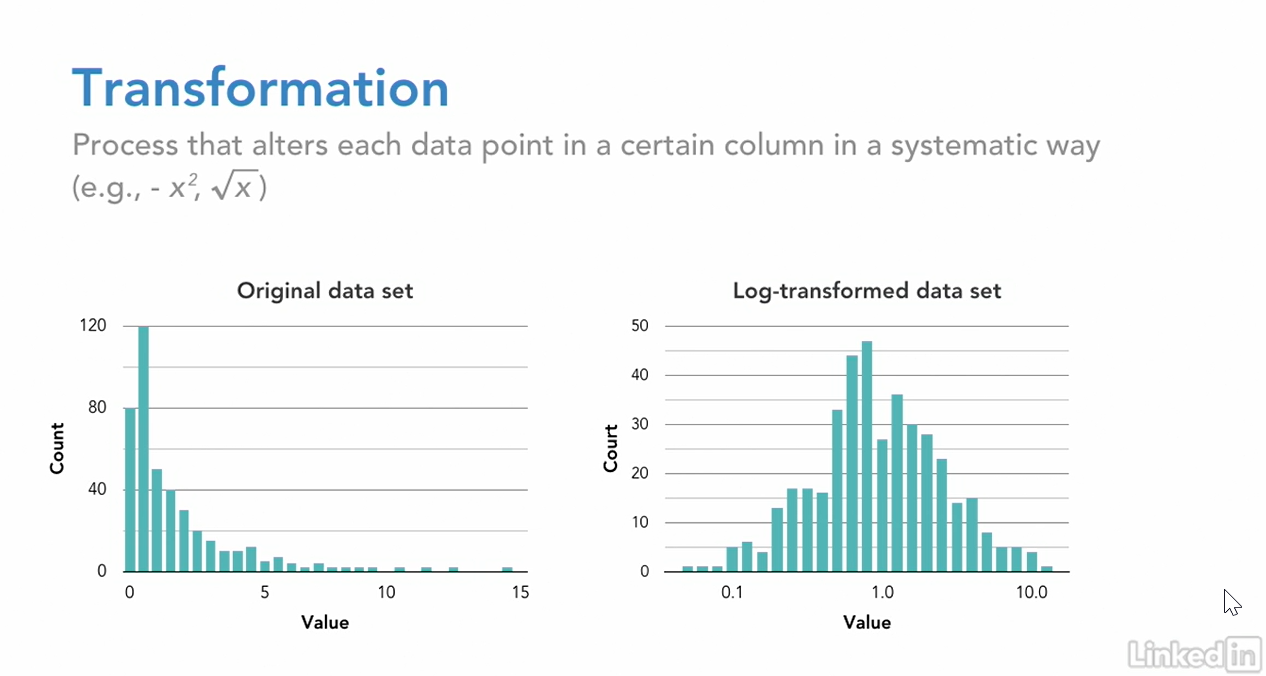
</div>



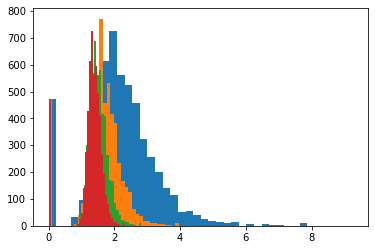

In [151]:
# we will loop through the transformations and find the best one (tnat looks like normal distrubution)

distribution_methods = [1/2, 1/3,1/4,1/5]
for method in distribution_methods:
    plt.hist(df["punctuation num divided by char num"]**method, bins = 40) # range can vary thats why we dont write it
    # plt.title(f"Transformation of {str(method)}")
    # plt.show() they appear in different graphs 
    # plt.legend( str(round(method,3))) labelları neden gosteremedimmmm ????

In [156]:
# delete unused features
#df.drop(["punctuation num divided by char num"], axis = 1, inplace = True)
# add useful features 
 
X = pd.concat([df["word_count"], pd.DataFrame(tfidf_features.toarray())], axis=1)
X.head()

,word_count,0,1,2,3,4,5,6,7,8,...,8097,8098,8099,8100,8101,8102,8103,8104,8105,8106
0,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
# prediction with random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
y = df["label"]

print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 42)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

(5568, 8108)


0.9778575703171754

In [159]:
# an amazing result! <3 Is it true for every case? NO

In [164]:
# use k fold and cross validation

from sklearn.model_selection import KFold, cross_val_score
rfc2 = RandomForestClassifier(n_jobs = -1) # use all cpu power
# kfold = KFold(n_splits = 5)
print(cross_val_score(rfc2, X_test,y_test, cv = 5, scoring = "accuracy", n_jobs = -1)) # for test data
print(cross_val_score(rfc2, X_train,y_train, cv = 5, scoring = "accuracy", n_jobs = -1)) # for train data

[0.96716418 0.94011976 0.9491018  0.95508982 0.96107784]
[0.96410256 0.97692308 0.96662388 0.96790757 0.97175866]


In [166]:
# see parameters of rfc

print(dir(RandomForestClassifier))
print(dir(RandomForestClassifier()))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__

### Some Notes
Short tail : fell of quickly \
Long tail : continues \
Dramatic skew : asymmetric data \
Cox Box Transformation : uses power transformations 
